In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np 
import argparse
import pickle 
import os
from model import EncoderCNN, DecoderRNN
from PIL import Image
from torchvision import transforms
from build_vocab import Vocabulary

In [2]:
print(torch.__version__)
device = torch.device('cpu')#'cuda' if torch.cuda.is_available() else 'cpu')

0.4.0


In [3]:
def load_image(image_path, transform=None):
    image = Image.open(image_path)
    image = image.resize([224, 224], Image.LANCZOS)
    
    if transform is not None:
        image = transform(image).unsqueeze(0)
    
    return image


# Image preprocessing
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), 
                             (0.229, 0.224, 0.225))])
 
embed_size=256
hidden_size=512
num_layers=1
with open('vocab.pkl', 'rb') as f:
        vocab = pickle.load(f)
#print(len(vocab))        
encoder = EncoderCNN(embed_size).eval()
decoder = DecoderRNN(embed_size, hidden_size, len(vocab), num_layers)
encoder = encoder.to(device)
decoder = decoder.to(device)

encoder.load_state_dict(torch.load('encoder-5-3000.pkl'))
decoder.load_state_dict(torch.load('decoder-5-3000.pkl'))
image = load_image('example.png', transform)
image_tensor = image.to(device)

feature = encoder(image_tensor)
print(feature.shape )
sampled_ids = decoder.sample(feature)
print(sampled_ids)

torch.Size([1, 256])
tensor([[    1,  8397,  8601,  4694,   699,  2965,   511,  5282,  1496,
          4966,    96,     2,    96,     2,     2,    96,     2,     2,
            96,     2]])


In [4]:
# Convert word_ids to words
sampled_caption = []
sampled_ids = sampled_ids[0].cpu().numpy()    
for word_id in sampled_ids:
    #print(word_id)
    word = vocab.idx2word[word_id]
    sampled_caption.append(word)
    if word == '<end>':
        break
sentence = ' '.join(sampled_caption)

In [5]:
print(sentence)

<start> a group of giraffes standing next to each other . <end>


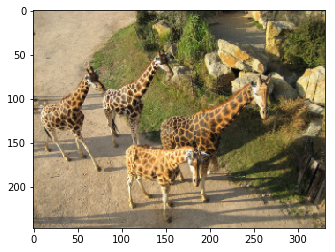

In [8]:
plt.imshow(Image.open('example.png'))
plt.show()